In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [55]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(datasets.load_diabetes(return_X_y=False).DESCR)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

print(diabetes_X.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [31]:
coefficients = []

for i in range(1000):

    diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=i)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)
    
    coefficients.append(float(regr.coef_))
    

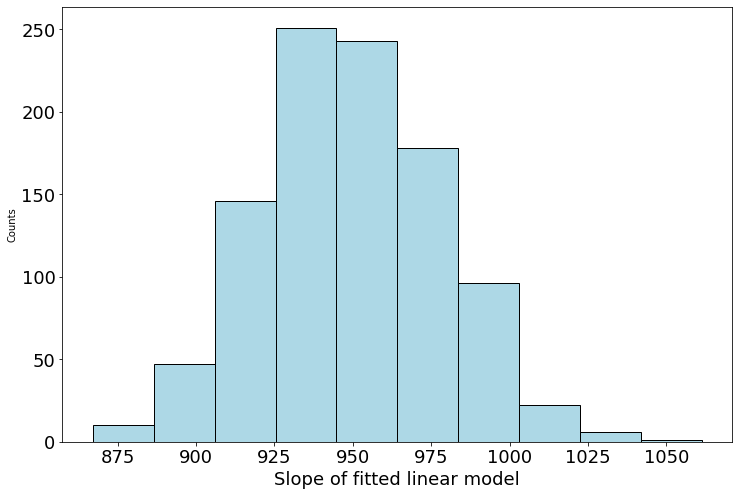

In [56]:
#plt.hist(coefficients, bins = 20)
fig = plt.figure(figsize= (12,8))
plt.hist(coefficients, bins=10, color = 'lightblue',edgecolor='black')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Counts')
plt.xlabel('Slope of fitted linear model', fontsize = 18)
plt.show()

Coefficients: 
 [998.57768914]
Mean squared error: 4061.83
Coefficient of determination: 0.23


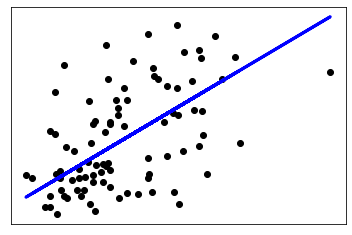

In [11]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()